# Inferential Stats Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import scipy
from scipy import stats
import statsmodels
import statsmodels.stats.weightstats
import seaborn as sns
%pylab inline

#wrangled data imported into a pandas dataframe
df = pd.read_csv('~/Documents/Repository/Capstone-1_WorldBank_GenderData/wrangled_data.csv')

Populating the interactive namespace from numpy and matplotlib


In [15]:
#test to verify that the distribution of Life Expectancy is normal
life = df['Life expectancy at birth, total (years)']
scipy.stats.normaltest(life, axis=0)

NormaltestResult(statistic=nan, pvalue=nan)

In [4]:
df['Life expectancy at birth, total (years)'].describe()

count    3699.000000
mean       69.041620
std         9.188963
min        38.690146
25%        63.304594
50%        71.308230
75%        75.587866
max        83.980488
Name: Life expectancy at birth, total (years), dtype: float64

In [6]:
#test to verify that the distribution of Contraceptive prevalence is normal
scipy.stats.normaltest(df['Contraceptive prevalence, any methods (% of women ages 15-49)'], axis=0, nan_policy='omit')

NormaltestResult(statistic=264.95699668268827, pvalue=2.9195720645692804e-58)

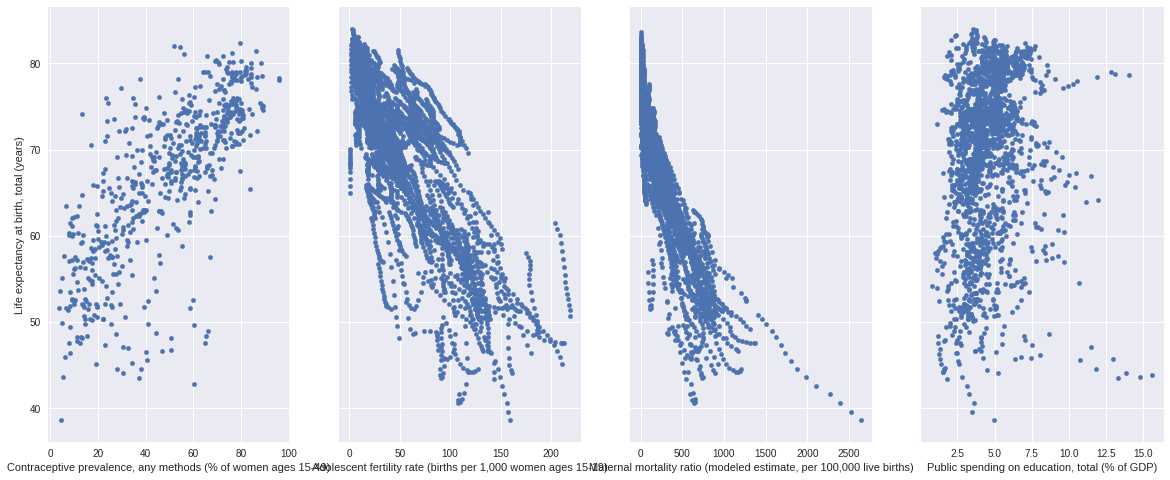

In [10]:
# visualize the relationship between independent variable and Life Expectancy using scatterplots
fig, axs = plt.subplots(1, 4, sharey=True)
df.plot(kind='scatter', x='Contraceptive prevalence, any methods (% of women ages 15-49)', y='Life expectancy at birth, total (years)', ax=axs[0], figsize=(20, 8))
df.plot(kind='scatter', x='Adolescent fertility rate (births per 1,000 women ages 15-19)', y='Life expectancy at birth, total (years)', ax=axs[1])
df.plot(kind='scatter', x='Maternal mortality ratio (modeled estimate, per 100,000 live births)', y='Life expectancy at birth, total (years)', ax=axs[2])
df.plot(kind='scatter', x='Public spending on education, total (% of GDP)', y='Life expectancy at birth, total (years)', ax=axs[3])


In [17]:
corr = pd.DataFrame()
corr['country'] = df['Country.Name']
corr['life'] = df['Life expectancy at birth, total (years)']
corr['bc'] = df['Contraceptive prevalence, any methods (% of women ages 15-49)']
corr['teen'] = df['Adolescent fertility rate (births per 1,000 women ages 15-19)']
corr['matdeath'] = df['Maternal mortality ratio (modeled estimate, per 100,000 live births)']
corr['eduspend'] = df['Public spending on education, total (% of GDP)']

import statsmodels.formula.api as smf

# create a fitted model in one line
contra = smf.ols(formula='life ~ bc', data=corr).fit()

# print the coefficients
contra.params

Intercept    52.173016
bc            0.294164
dtype: float64

In [18]:
adole = smf.ols(formula='life ~ teen', data=corr).fit()
adole.params

Intercept    78.186157
teen         -0.169281
dtype: float64

In [19]:
momdead = smf.ols(formula='life ~ matdeath', data=corr).fit()
momdead.params

Intercept    74.567809
matdeath     -0.027309
dtype: float64

In [20]:
edu = smf.ols(formula='life ~ eduspend', data=corr).fit()
edu.params

Intercept    65.161661
eduspend      0.964530
dtype: float64

In [21]:
scipy.stats.pearsonr(corr.bc,corr.life)

(nan, 1.0)